In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

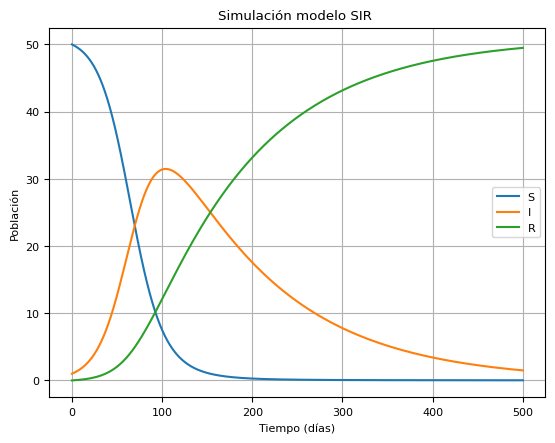

In [31]:
# SIR model equations
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]


"""
Initial conditions (such as S0, I0, and R0) are not to be random but I hardcoded them with specific values. These choices are typically made based on the characteristics of the disease being modeled and the context of the simulation. Initial condition are set such that S0 = 99%, which indicates the proportion of susceptible individuals when the simulation starts. I0 is set to 1%, which indicates proportion of infected individuals to be 1% when the simulation starts. R0 is set to 0% which is expected that there are are no recovered individuals when the simulations start.
"""
S0 = 50.
I0 = 1.
R0 = 0.
y0 = [S0, I0, R0]

# Parameters
# β (beta) is transmission rate and I chose 30%. γ (gamma) is set to 1%
beta = 0.0013
gamma = 0.0083

# Time vector
t = np.linspace(0, 500, 2000)  # Simulate for 200 days

# Solve the SIR model equations using odeint()
solution = odeint(SIR_model, y0, t, args=(beta, gamma))

# Extract results
S, I, R = solution.T

# Plot the results
#plt.figure(figsize=(10, 6))
plt.plot(t, S, label='S')
plt.plot(t, I, label='I')
plt.plot(t, R, label='R')
plt.xlabel('Tiempo (días)')
plt.ylabel('Población')
plt.title('Simulación modelo SIR ')
plt.legend()
plt.grid(True)
plt.savefig('SIR.png')

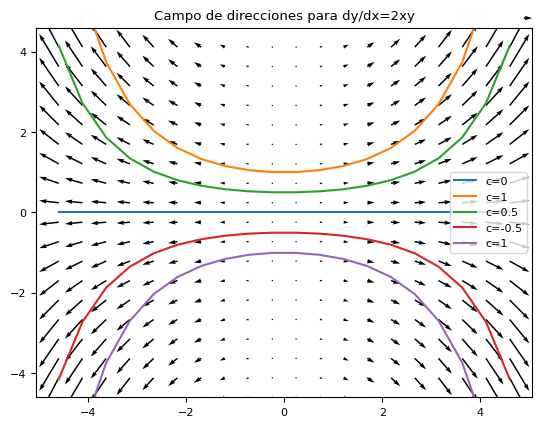

In [32]:
x = np.linspace(-4.6, 4.6, 20)
c0=0
c1 = 1
c2 = 0.5
c3 = -0.5
c4 = -1
X, Y = np.meshgrid(np.linspace(-4.6, 4.6, 20),np.linspace(-4.6, 4.6, 20))
V = (0.2*(X**2)*Y)/2
U = X

fig1, ax1 = plt.subplots()
ax1.set_title('Campo de direcciones para dy/dx=2xy')
ax1.plot(x,c0*np.exp(0.1*x**2),label='c=0')
ax1.plot(x,c1*np.exp(0.1*x**2),label='c=1')
ax1.plot(x,c2*np.exp(0.1*x**2),label='c=0.5')
ax1.plot(x,c3*np.exp(0.1*x**2),label='c=-0.5')
ax1.plot(x,c4*np.exp(0.1*x**2),label='c=1')
Q = ax1.quiver(X,Y, U,V, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.ylim([-4.6,4.6])
plt.legend()
plt.savefig('VF.png')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

beta = 0.0013
omega = 0.0083

d=symengine.symbols("d")
equations=[
  omega*y(1,t-d) - beta*y(1, t)*y( 0 , t ),
	beta*y(1, t)*y(0, t)-omega*y(1,t),
	omega*y(1, t)-omega*y(1,t-d)]

ddesys = jitcdde(equations, control_pars=[d], max_delay=300.)

plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(1, 1)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)

ts = np.linspace(0, 500, 20000)

ddesys.constant_past([50., 1.,0.])
params=[200.]
ddesys.set_parameters(*params)
ys = []
for t in ts:
	ys.append(ddesys.integrate(t))
ys=np.array(ys)
axs.plot(ts, ys[:,0], color='red', linewidth=1,label='S')
axs.plot(ts, ys[:,1], color='blue', linewidth=1,label='I')
axs.plot(ts, ys[:,2], color='green', linewidth=1,label='R')
plt.xlabel('Tiempo (días)')
plt.ylabel('Población')
plt.title('Simulación modelo SIR con retardo')
plt.legend()
plt.grid(True)
plt.savefig('SIRR.png')

ModuleNotFoundError: No module named 'distutils'